# <center><u>Insurance Data Analysis</u></center>

### Data Description:
The data at hand contains medical costs of people characterized with age, sex, bmi, children, smoker, region, charges attributes.
### File Name: 
insurance.csv
### Objective:
To dive deep into this data, to check if we can find out some valuable insights.
### Analysis By:
Soumalya Biswas (Group-3)

# =============================================================

#### 1. Importing the necessary libraries to analyse data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<b>Comment:</b> Importing the pandas library to access the dataframe and for graphical representation I used seaborn and matplotlib. Also I have imported f_oneway, wightstats, proportions_ztest from scipy library and statsmodel library for statistical testing.

#### 2. Reading the data as a data frame

In [52]:
ins_df = pd.read_csv('insurance.csv')
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<b>Comment:</b> Read the data from insurance.csv file using pandas function called read_csv and stored the dataframe in variable named ins_df. Also displayed the first 5 row of the data from dataframe using head function.

#### 3. Performing the basic EDA

In [53]:
# a. Shape of the data
rows, columns = ins_df.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 1338 rows and 7 columns in the dataframe.


In [54]:
# also checking the length of the index of the data
len(ins_df.index)

1338

<b>Comment:</b> Found the Row size and the index sizes are equal which is 1338 in the dataset against the columns size 7.

In [55]:
# b. Data type of each attribute
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [56]:
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<b>Comment:</b> I found in between 7 attributes of the data there are 3 data types present. Where available datatype is - <br>2 integers type (age, children),<br> 3 object type (sex, smoker, region),<br> 2 float type (bmi, charges) <br>

Also I can say that, total 4 attributes are there which is numeric out of them 2 discrete variables and 2 continuous varibles are present

In [57]:
# c. Checking the presence of missing values
ins_df.isnull().values.any()

False

In [58]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>Comment:</b> I found there is no missing values in the dataframe. For that I used isnull function of dataframe and there I checked if any isnull values present or not. I found False return. And also checked the sum of null values on each attribute which is 0 in our dataset.

Also for more evidence, if I checked the above info function output it's showing me all equal distribution of rows in between different data types. So, I can say there is no missing values in this dataset.

In [59]:
# d. 5 point summary of numerical attributes

# Key Characteristics of Numerical data
five_points_summury = ins_df.describe().T
five_points_summury

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Mean and the median is same for the age, so we can say it is normally distributed.
* charges are very much at the max portion, it is skewed a lot towards right side.

In [60]:
# Five point summury
five_points_summury[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<b>Comment:</b> I used describe function of dataframe to determine the 5 point summary of numerical attributes. Applied transpose to the result and stored in a variable called five_points_summury.

Here We I can see the key characteristics of our numerical datas like mean, standard deviation  of age, bmi, charges etc. 

Then I displayed the 5 point summury where some important insights I found like min and max charges, age etc. which will help me in my next analylisis.

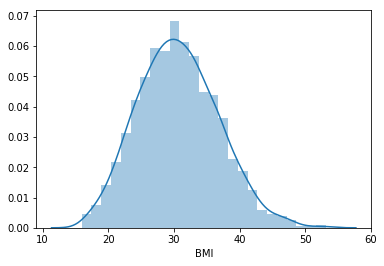

In [61]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.distplot(ins_df['bmi'],axlabel='BMI', label="Distribution of BMI")

<b>Here in the above graph I represented the distribution of BMI through out the dataset. I used seaborn displot function for this. I found the BMI data is almost Symmetric / normally distributed except slight right skewness.</b> 
    
   <b>So, Maximum BMI counts lied around 30 and more which exceed the normal level (ideally 18.5 to 24.9) of BMI .</b>

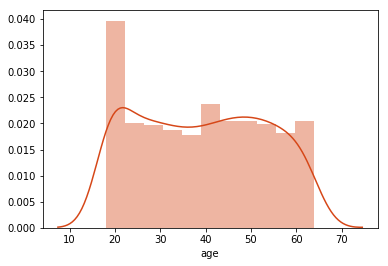

In [62]:
sns.distplot(ins_df['age'],color='#d64718')

<b>Here in the above graph I represent the distribution of AGE through out the dataset. I used seaborn displot function for this.</b> 

<b>As age is discrete variable type, the shape of the distribution is quite uniform / flat. And the maximum no. of people in the data set lied around 20 yrs.</b>

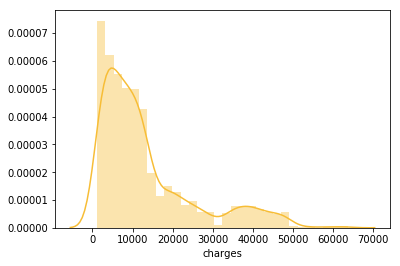

In [63]:
sns.distplot(ins_df['charges'], color="#f7bd36")

<b>Here in the above graph I represent the distribution of CHARGES through out the dataset. I used seaborn displot function for this. I found the CHARGES data is right skewed.</b>


<b>So, I found the maximum chages lied below 10000.
</b>

In [64]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
skewness = ins_df[['age','bmi','charges']].skew()
skew_df = pd.DataFrame({'Skew': skewness})
skew_df.head()

,Skew
age,0.055673
bmi,0.284047
charges,1.515880


<b>Comment:</b> I used skew function to measure the skewness. I found 
* charges is the most skewed data in right side as measurment is in positive side. 
* Same to bmi but much less right skewness is there. 
* And for age I can say no skewness as it's a discreate value and data distribution is uniform.

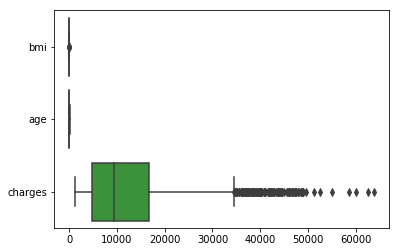

In [65]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
sns.boxplot(data=ins_df[['bmi','age','charges']], orient='h')

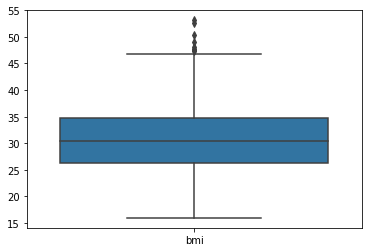

In [66]:
# boxplot for BMI
sns.boxplot(data=ins_df[['bmi']])

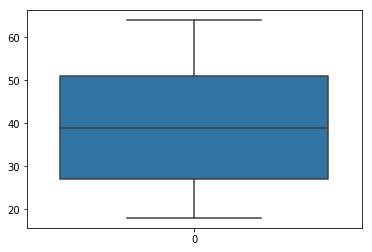

In [67]:
# boxplot for AGE
sns.boxplot(data=ins_df['age'])

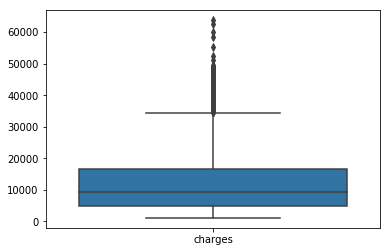

In [68]:
# boxplot for CHARGES
sns.boxplot(data=ins_df[['charges']])

<b>Comment:</b> I have used seaborn boxplot function for the graphical representation and fin there is outlier present in the charges and bmi data. 

<u>Also checked the individual box plot,</u><br>
 a. Bottom black horizontal line of box plot is minimum value.<br>
 b. First black horizontal line of rectangle shape of box plot is First quartile or 25%<br>
 c. Second black horizontal line of rectangle shape of box plot is Second quartile or 50% or median.<br>
 d. Third black horizontal line of rectangle shape of box plot is third quartile or 75%<br>
 e. Top black horizontal line of rectangle shape of box plot is maximum value.<br>
 f. Small diamond shape of box plot is <b>outlier data</b>.

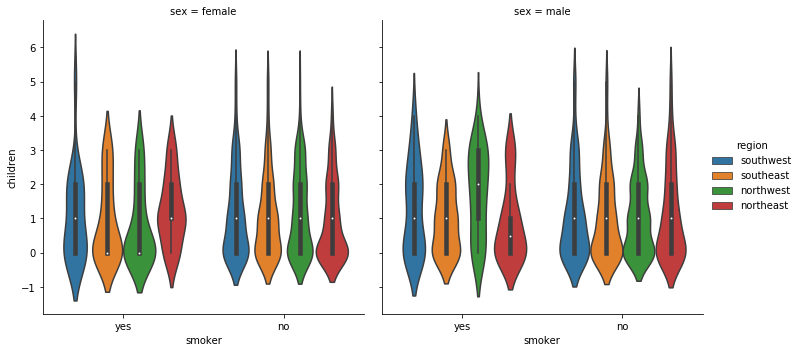

In [69]:
# h. Distribution of categorical columns (include children)

sns.catplot(x='smoker', y='children', hue='region', col='sex', data=ins_df, kind="violin")

<b>Comment: </b> I used the seaborn catplot function with violin graph to display the distributions of categorical variables.

<u>Few Facts</u><br>
* Distribution of Female smokers are apparently same on southeast and northwest region.
* Most number of people are fall into no children category.
* Male smokers in northwest region having more than 1 number of dependencies. 

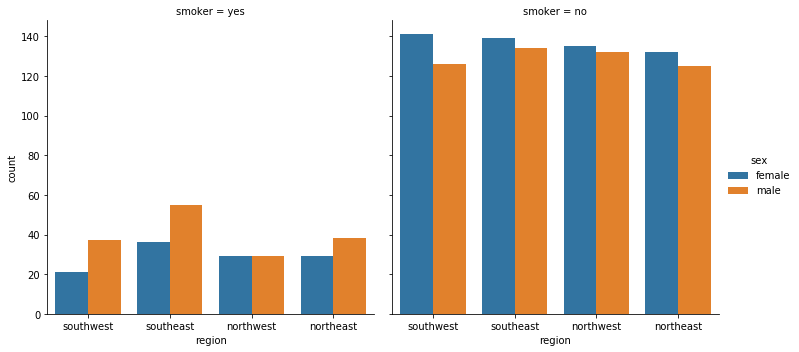

In [70]:
sns.catplot(x='region', hue='sex', col='smoker', data=ins_df, kind="count")

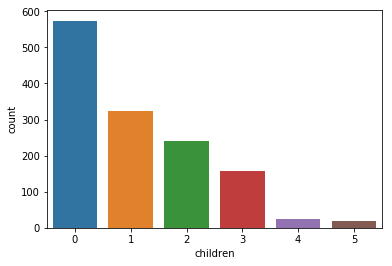

In [71]:
sns.countplot(ins_df['children'])

<b>Comment:</b> Also I have used countplot to show the distribution od categorical data including children attribute. I found few interesting facts:<br>
 a. No. of non-smokers are greater than smokers.<br>
 b. People from southeast zone are more.<br>
 c. People having no children or zero dependencies are more.

Text(0.5, 1, 'Pair plot of numeric data w.r.t sex')

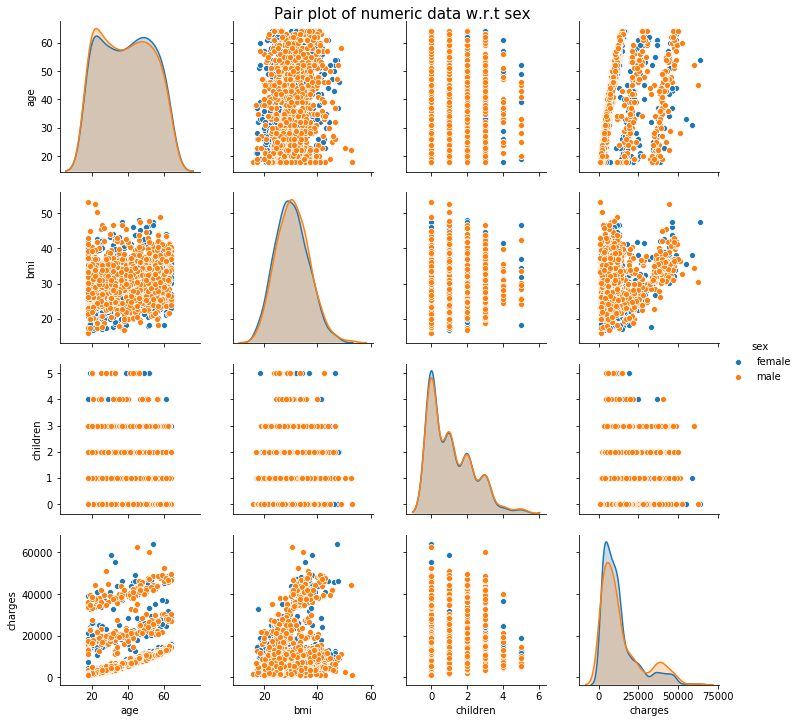

In [72]:
# i. Pair plot that includes all the columns of the dataframe
sns.pairplot(ins_df,hue='sex')
plt.suptitle('Pair plot of numeric data w.r.t sex', y=1,size=15)

<b>Comment:</b> I used paiplot with sex categorical variable as hue to find out if there is some relation between the numerical data and the category. 
* Here charges and age positively correlated with each other irrespective.
* We can also say, People whose BMI is high, charges are also high.
* Age and Bmi is uniform in relation irrespective of gender.

Text(0.5, 1, 'Pair plot of numeric data w.r.t region')

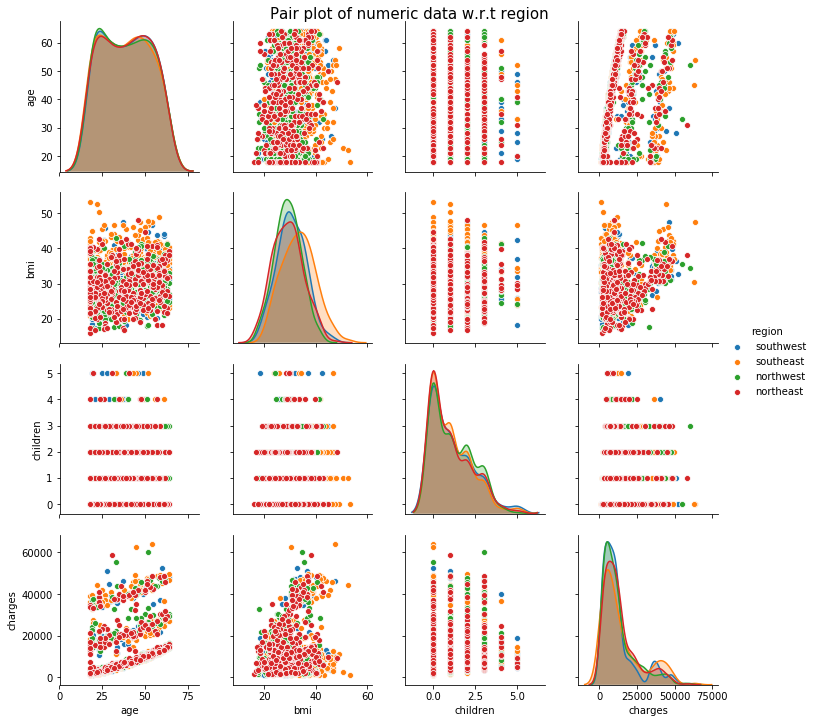

In [73]:
sns.pairplot(ins_df,hue='region')
plt.suptitle('Pair plot of numeric data w.r.t region', y=1,size=15)

<b>Comment:</b> I used paiplot with region categorical variable as hue to find out if there is some relation between the numerical data and the category. <br>
I found some interesting facts:<br>
 * Insurance charges are less for the northeast zone people.<br>
 * BMI level and age is very positively related with each other for southwest zone people.

Text(0.5, 1, 'Pair plot of numeric data w.r.t smoker/non-smoker')

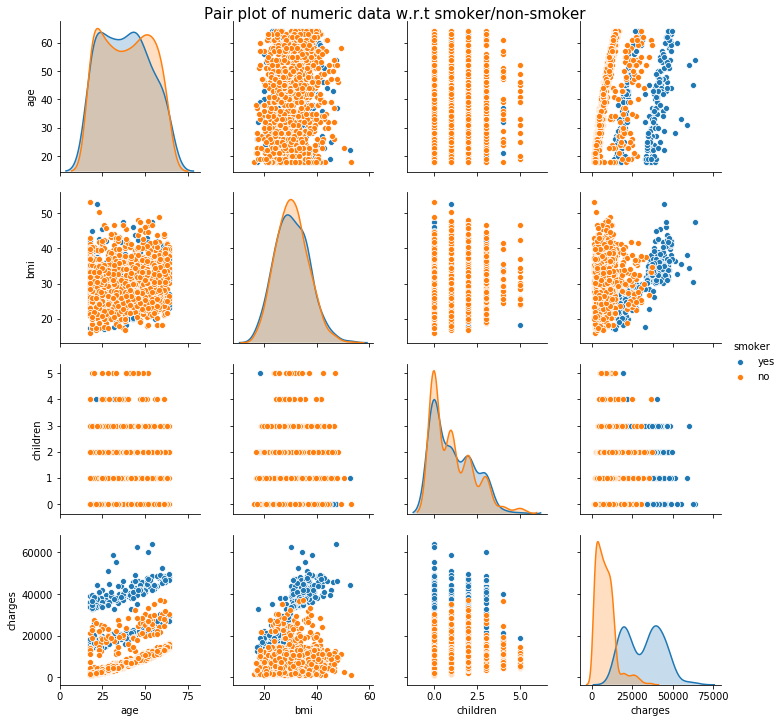

In [74]:
sns.pairplot(ins_df,hue='smoker')
plt.suptitle('Pair plot of numeric data w.r.t smoker/non-smoker', y=1,size=15)

<b>Comment:</b> I used paiplot with smoker categorical variable as hue to find out if there is some relation between the numerical data and the category. <br>
I found some interesting facts:<br>
 * Insurance charges for smokers are higher that the non-smokers in differents ages.<br>
 * BMI of smokers and non-skomers are alomost equal.

#### 4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the people who don't?

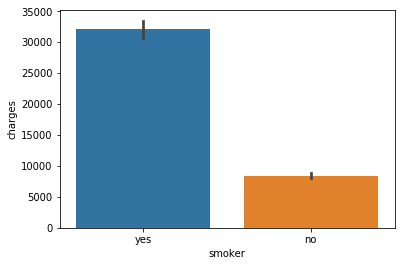

In [75]:
sns.barplot(ins_df['smoker'],ins_df['charges'])

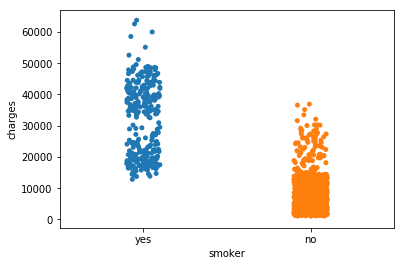

In [76]:
sns.stripplot(ins_df['smoker'],ins_df['charges'])

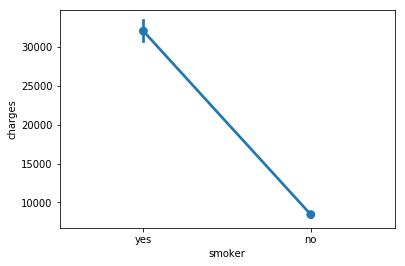

In [77]:
sns.pointplot(ins_df['smoker'],ins_df['charges'])

<b>Initial Observation: </b> On a first glance, I found the charges for the smokers are higher than the non-smokers from the above graphs.<br><br><b>Lets find some statistical evidence</b>


<b>Null Hypothesis (H0):</b> Charges are equal for smokers and non-smokers<br>
<b>Alternative Hypothesis (H1):</b> Charges are not equal for smokers and non-smokers

The significance level (α) = 0.05


In [78]:
# Find out the mean for smoker group and non-smoker group
α = 0.05
smoker_group_charges = ins_df[ins_df['smoker'] == 'yes']['charges']
non_smoker_group_charges = ins_df[ins_df['smoker'] == 'no']['charges']

# Have to do Z Test as our no. of samples are more than 30.

In [79]:
# 2. Z Test
statistic, p_value = weightstats.ztest(smoker_group_charges, non_smoker_group_charges, value=0,alternative='two-sided')
p_value

0.0

In [80]:
# Checking the result
if p_value < α:
    print (f"Rejecting the null hypothesis(H0) in zTest test as P value ({round(p_value,4)}) is less than the significance level.")
else:
    print(f"Fail to reject null hypothesis(H0) in zTest test as P value ({round(p_value,4)}) is greater that sigficance level.")

Rejecting the null hypothesis(H0) in zTest test as P value (0.0) is less than the significance level.


<b>Observation:</b> In the above test I got the result and I can see the P Value which is almost zero, much lesser than my test significance level. Same thing I found the initial graphs too. 


Hence, I'm <b>rejecting the null hypothesis</b> and stating that <b>charges of insuarances are significantly differ among the smokers and non-smokers.</b>
<hr>

b. Does bmi of males differ significantly from that of females?

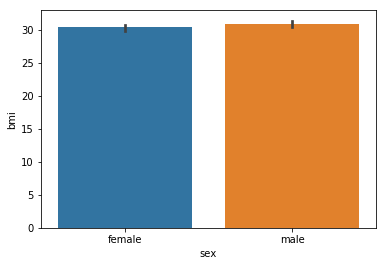

In [81]:
sns.barplot(ins_df['sex'],ins_df['bmi'])

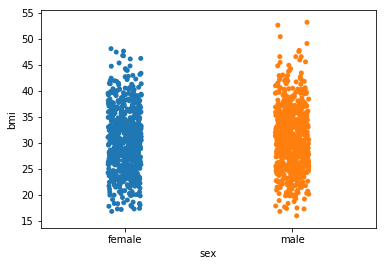

In [82]:
sns.stripplot(ins_df['sex'],ins_df['bmi'])

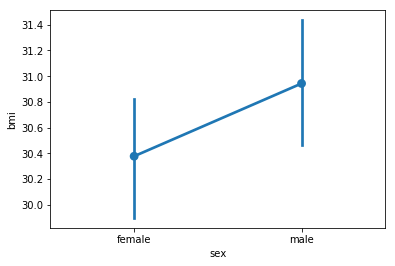

In [83]:
sns.pointplot(ins_df['sex'],ins_df['bmi'])

<b>Initial Observation: </b> From the above graphs, I found the BMI between the males and females are not differ significantly as differences vary nearly 0.8.<br><br><b>Lets find some statistical evidence</b>


<b>Null Hypothesis (H0):</b> Mean of the BMI is equal between male and female.<br>
<b>Alternative Hypothesis (H1):</b> Mean of the BMI is not equal between male and female.

The significance level (α) = 0.05


In [84]:
# Find out the mean for smoker group and non-smoker group
α = 0.05
male_bmi = ins_df[ins_df['sex'] == 'male']['bmi']
female_bmi = ins_df[ins_df['sex'] == 'female']['bmi']

# Have to do Z Test as our no. of samples are more than 30.

In [85]:
# Using zTest
statistic, p_value = weightstats.ztest(male_bmi, female_bmi, value=0,alternative='two-sided')
p_value

0.08974343679943912

In [86]:
# Checking the result
if p_value < α:
    print (f"Rejecting the null hypothesis(H0) in zTest test as P value ({round(p_value,4)}) is less than the significance level.")
else:
    print(f"Fail to reject null hypothesis(H0) in zTest test as P value ({round(p_value,4)}) is greater that sigficance level.")

Fail to reject null hypothesis(H0) in zTest test as P value (0.0897) is greater that sigficance level.


<b>Observation:</b> In the above test I got the result and I can see the P Value which is greater than my test significance level. Same thing I found the initial graphs too. 


Hence, I've <b>fail to rejecting the null hypothesis</b> and stating that <b>bmi levels are not significantly differ among the gender.</b>
<hr>

c. Is the proportion of smokers significantly different in different genders?

 * 'sex' and 'smoker' are two categorical variables in the dataset

In [87]:
# total number of females in the dataset
total_females = ins_df[ins_df['sex'] == 'female']['sex'].value_counts()
# total number of males in the dataset
total_males = ins_df[ins_df['sex'] == 'male']['sex'].value_counts()

# number of female smokers
female_smokers = ins_df[(ins_df['sex'] == 'female') & (ins_df['smoker'] == 'yes')]['smoker'].value_counts()
# number of male smokers
male_smokers = ins_df[(ins_df['sex'] == 'male') & (ins_df['smoker'] == 'yes')]['smoker'].value_counts() 

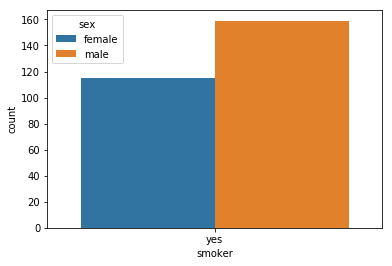

In [88]:
sns.countplot(ins_df[(ins_df['smoker'] == 'yes')]['smoker'], hue=ins_df['sex'])

In [89]:
print(f' No. of smokers in males, females = {male_smokers}, {female_smokers} respectively')

 No. of smokers in males, females = yes    159
Name: smoker, dtype: int64, yes    115
Name: smoker, dtype: int64 respectively


 Proportion of smokers in males, females = 0.24%, 0.17% respectively


([<matplotlib.patches.Wedge at 0x1a2079c208>,
 [Text(0.9402149514167405, 0.570960458466623, 'Female'),
  Text(-0.28238296708643523, 1.0631368020623975, 'Male'),
  Text(-0.3104621217244707, -1.0552787645804023, 'Non-Smokers')])

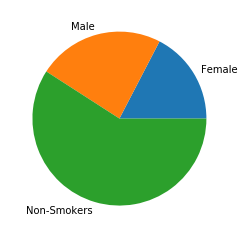

In [90]:
percentage_male_smoker = male_smokers[0] / total_males[0]
percentage_female_smoker = female_smokers[0] / total_females[0]
print(f' Proportion of smokers in males, females = {round(percentage_male_smoker,2)}%, {round(percentage_female_smoker,2)}% respectively')
plt.pie([percentage_female_smoker,percentage_male_smoker,(1-(percentage_female_smoker+percentage_male_smoker))], labels=['Female', 'Male','Non-Smokers'])

<b>Initial Observation: </b> From the above calculation and graph, I found the proportion of the smokers among the gender differs from each other.<br><br><b>Lets find some statistical evidence</b>


<b>Null Hypothesis (H0):</b> Proportion of the smokers is equal between male and female.<br>
<b>Alternative Hypothesis (H1):</b> Proportion of the smokers is not equal between male and female.

The significance level (α) = 0.05

In [91]:
# Using z Proportion test to evaluate the statistical result
statistic, p_value = proportions_ztest([female_smokers[0], male_smokers[0]] , [total_females[0], total_males[0]])
p_value

0.005324114164320532

In [92]:
if p_value < α:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. So, We reject the null hypothesis (H0)')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. So, We fail to reject the null hypothesis (H0)')

With a p-value of 0.0053 the difference is significant. So, We reject the null hypothesis (H0)


<b>Observation:</b> In the above test I got the result and I can see the P Value which is much lesser than my test significance level. Same thing I found the initial graphs too. 


Hence, I'm <b>rejecting the null hypothesis</b> and stating that <b>proportion of male skokers are significantly differ from the female smokers.</b>
<hr>

d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [93]:
# Grouping of female with no children, one children and two children
bmi_of_female_with_no_child = ins_df[(ins_df['sex'] == 'female') & (ins_df['children'] == 0)]['bmi']
bmi_of_female_with_one_child = ins_df[(ins_df['sex'] == 'female') & (ins_df['children'] == 1)]['bmi']
bmi_of_female_with_two_child = ins_df[(ins_df['sex'] == 'female') & (ins_df['children'] == 2)]['bmi']

# Creating three dataframe with category for the BMI of Female with no children, one children and two children
bmi_no_df = pd.DataFrame({'type': 'NOCHILD', 'mean_bmi': bmi_of_female_with_no_child})
bmi_one_df = pd.DataFrame({'type': 'ONECHILD', 'mean_bmi': bmi_of_female_with_one_child})
bmi_two_df = pd.DataFrame({'type': 'TWOCHILD', 'mean_bmi': bmi_of_female_with_two_child})

# Creating a single dataframe and merging above three dataframe into it
bmi_mean_df = pd.DataFrame()
bmi_mean_df = bmi_mean_df.append(bmi_no_df)
bmi_mean_df = bmi_mean_df.append(bmi_one_df)
bmi_mean_df = bmi_mean_df.append(bmi_two_df)

Extract the values of three groups, the BMI of the women with no children, one children and three children and stored those it variables named <b>bmi_of_female_with_no_child, bmi_of_female_with_one_child</b> and <b>bmi_of_female_with_two_child </b> respectively.

Text(0.5, 1, 'Mean BMI of Female Population')

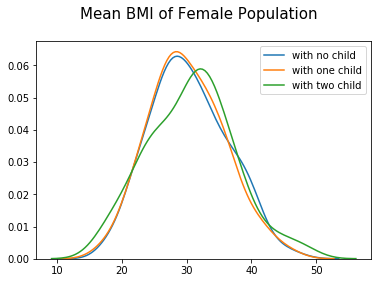

In [94]:
sns.kdeplot(bmi_no_df['mean_bmi'], label="with no child")
sns.kdeplot(bmi_one_df['mean_bmi'], label="with one child")
sns.kdeplot(bmi_two_df['mean_bmi'], label="with two child")
plt.suptitle('Mean BMI of Female Population', y=1,size=15)

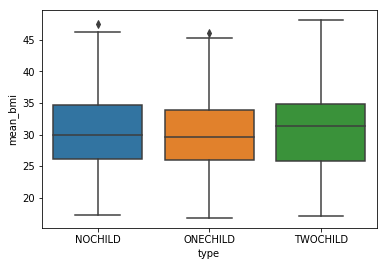

In [95]:
sns.boxplot('type', 'mean_bmi', data=bmi_mean_df)

<b>Comment : </b> From the above two graph I can assume, there is very insignificant difference present between three groups.

Assuming that, we are having there groups<br>
 a. Women with no children<br>
 b. Women with one children<br>
 c. Women with three children<br>
 
 
<b>Null Hypothesis (H0):</b>  Mean ($\mu$) of BMI between all the above three groups are equal.<br>
<b>Alternative Hypothesis (H1):</b> Atleast one Mean ($\mu$) of BMI between all the above three groups are not same.

We will test the P Value with significance level (α) = 0.05


In [96]:
# Choosed Annova test as we need to find out the difference in the mean of three group and it is one way annova as I'm testing the data with two category.
# Implementing the One Way ANNOVA test
α = 0.05
statistic, p_value = f_oneway(bmi_of_female_with_no_child,bmi_of_female_with_one_child,bmi_of_female_with_two_child)
p_value

0.7158579926754841

In [97]:
if p_value < α:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. So, We reject the null hypothesis (H0)')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. So, We fail to reject the null hypothesis (H0)')

With a p-value of 0.7159 the difference is not significant. So, We fail to reject the null hypothesis (H0)


In [98]:
# For further checking, how much the mean differ from each othe and to confirming the f_oneway test
# using tukey HSD (Honestly Significant Difference) test
tukey = pairwise_tukeyhsd(endog=bmi_mean_df['mean_bmi'],  # Data
                          groups=bmi_mean_df['type'],     # Groups
                          alpha=α)                     # Significance level

group1,group2,meandiff,lower,upper,reject
NOCHILD,ONECHILD,-0.3089,-1.7186,1.1008,False
NOCHILD,TWOCHILD,0.2883,-1.2636,1.8402,False
ONECHILD,TWOCHILD,0.5971,-1.1323,2.3265,False


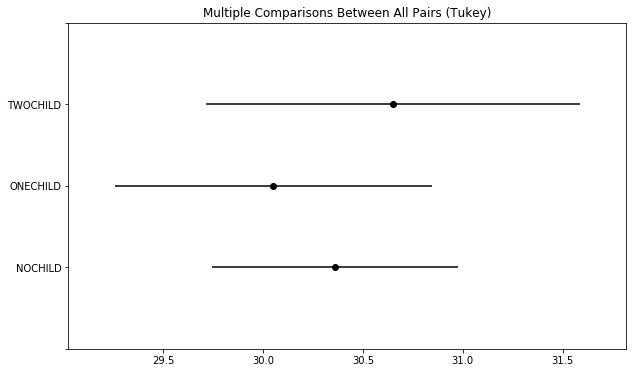

In [99]:
# Plot group confidence intervals
tukey.plot_simultaneous()
# See test summary
tukey.summary()

<b>Comment : </b> I can see the difference between the $\mu$ is lie between 30.1 - 30.7, which  is absolutely not significantly differed. Also test of the mean differences between three groups resulting as false.
 * female bmi with no child - female bmi with one child = -0.3089
 * female bmi with no child - female bmi with two child = 0.2883
 * female bmi with one child - female bmi with two child = 0.5971
 
And as I got three false results out of three mean difference. I can say, I've failed to reject the null hypothesis (H0).

<b>Observation:</b> In the above tests I got the result and I can see the P Value which is greater than my test significance level. Same thing I found in the mean difference test also. 


Hence, I've <b>failed to reject the null hypothesis</b> and stating that <b>the distribution of bmi across women with no children, one child and two children are the same.</b>

### <center>============================ X ============================</center>